http://preview.d2l.ai/d2l-en/master/chapter_computer-vision/image-augmentation.html
https://github.com/StevenJokes/Dive-into-DL-PyTorch/blob/master/docs/chapter09_computer-vision/9.1_image-augmentation.md


https://github.com/ShusenTang/Dive-into-DL-PyTorch/blob/master/docs/chapter09_computer-vision/9.1_image-augmentation.md

In [1]:
!pip install -U git+https://github.com/d2l-ai/d2l-en.git@master

  Cloning https://github.com/d2l-ai/d2l-en.git (to revision master) to /tmp/pip-req-build-gxb_ypz8
  Running command git clone -q https://github.com/d2l-ai/d2l-en.git /tmp/pip-req-build-gxb_ypz8
  Created wheel for d2l: filename=d2l-0.14.4-cp36-none-any.whl size=58406 sha256=000bd9ce0dcfc244f1e159d72e1b128f0f3a409421460c6516c21099d5304fb0
  Stored in directory: /tmp/pip-ephem-wheel-cache-vi3mqfd9/wheels/0f/41/8f/72ece70ede8a0e37eec72c03087eb4604925ba212b804f8cad
Successfully built d2l


In [2]:
%matplotlib inline
from d2l import torch as d2l
from torch import nn
from PIL import Image
import torchvision


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd drive/My Drive/d2l-en/d2l-en-colab

/content/drive/My Drive/d2l-en/d2l-en-colab


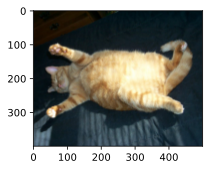

In [6]:
d2l.set_figsize()
img = Image.open('./img/cat1.jpg')
d2l.plt.imshow(img);

In [7]:
#@save
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [8]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

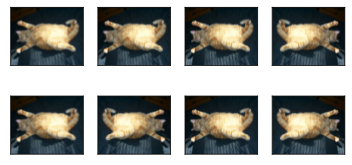

In [9]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

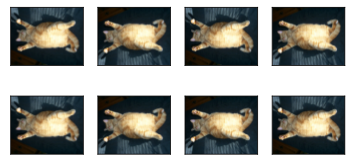

In [10]:
apply(img, torchvision.transforms.RandomVerticalFlip())

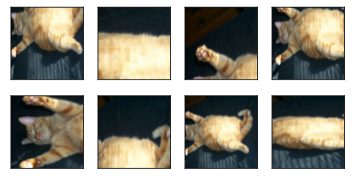

In [11]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    200, scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

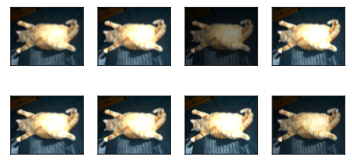

In [12]:
apply(img, torchvision.transforms.ColorJitter(brightness=0.5))

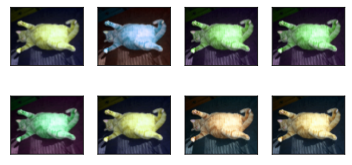

In [13]:
apply(img, torchvision.transforms.ColorJitter(hue=0.5))

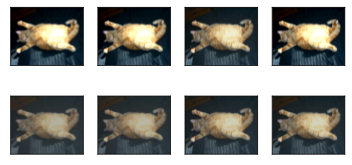

In [14]:
apply(img, torchvision.transforms.ColorJitter(contrast=0.5))

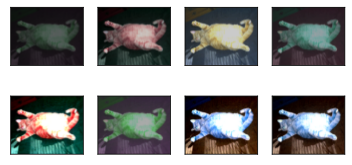

In [15]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

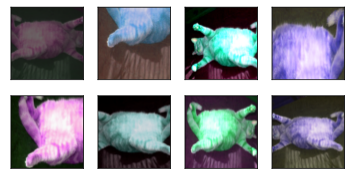

In [16]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

Extracting /root/Datasets/CIFAR/cifar-10-python.tar.gz to /root/Datasets/CIFAR


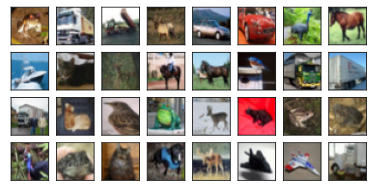

In [17]:
all_imges = torchvision.datasets.CIFAR10(train=True, root="~/Datasets/CIFAR", download=True)
# all_imges的每一个元素都是(image, label)
show_images([all_imges[i][0] for i in range(32)], 4, 8, scale=0.8);

In [18]:
flip_aug = torchvision.transforms.Compose([
     torchvision.transforms.RandomHorizontalFlip(),
     torchvision.transforms.ToTensor()])

no_aug = torchvision.transforms.Compose([
     torchvision.transforms.ToTensor()])

In [20]:
import sys

In [21]:
num_workers = 0 if sys.platform.startswith('win32') else 4
def load_cifar10(is_train, augs, batch_size, root="~/Datasets/CIFAR"):
    dataset = torchvision.datasets.CIFAR10(root=root, train=is_train, transform=augs, download=True)
    return DataLoader(dataset, batch_size=batch_size, shuffle=is_train, num_workers=num_workers)

In [26]:
num_workers = 0 if sys.platform.startswith('win32') else 4
def load_cifar10(is_train, augs, batch_size, root="~/Datasets/CIFAR"):
    return torch.utils.data.DataLoader(torchvision.datasets.CIFAR10(root=root, train=is_train, transform=augs, download=True),
                                       batch_size=batch_size, shuffle=is_train, 
                                       num_workers=num_workers)

In [27]:
def load_cifar10(is_train, augs, batch_size, root="~/Datasets/CIFAR"):
    return torch.utils.data.DataLoader(torchvision.datasets.CIFAR10(root=root, train=is_train, transform=augs, download=True),
                                       batch_size=batch_size, shuffle=is_train, 
                                       num_workers=d2l.get_dataloader_workers())

In [ ]:
#@save
def train_batch_ch13(net, features, labels, loss, trainer, devices,
                     split_f=d2l.split_batch):
  net = net.to(device)
  X_shards, y_shards = split_f(features, labels, devices)
  